In [1]:
%matplotlib inline
import numpy
import torch

In [2]:
#t_c are temperatures in Celsius, and t_u are the unknown units. Y
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

In [3]:
tc = torch.tensor(t_c)
tu = torch.tensor(t_u)

In [12]:
def model(tu, w, b):
    return w*tu + b

In [44]:
def loss_fun(tp, tc):
    sq_diff = (tp - tc)**2
    return sq_diff.mean()

In [45]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [14]:
w = torch.ones(1)
b = torch.ones(1)

In [56]:
tp = model(tu, w, b)
tp

tensor([19.7413, 30.6071, 31.8443, 44.5928, 30.8223, 26.8417, 18.7731, 12.2644,
        26.5728, 33.0277, 37.3310])

In [16]:
loss = loss_fn(tp,tc)
loss

tensor(1847.4847)

In [17]:
d = 0.1
loss_rate_w = (loss_fn(model(tu,w+d,b),tc) - loss_fn(model(tu,w-d,b),tc))/2.0*d

In [18]:
loss_rate_w


tensor(46.2090)

In [19]:
lr = 1e-2
w = w - loss_rate_w*lr

In [20]:
loss_rate_b = (loss_fn(model(tu,w,b+d),tc) - loss_fn(model(tu,w,b-d),tc))/2.0*d
b = b - loss_rate_w*lr

In [21]:
# Getting analytical, computing gradient

def dloss_fun(tp, tc):
    return 2*(tp-tc)

As for the model, recalling that the model is
```
In[3]:
def model(t_u, w, b):
return w * t_u + b
you get derivatives of
```

In [22]:
def dmodel_dw(tu,w,b):
    return tu

In [23]:
def dmodel_db(tu,w,b):
    return 1.0

In [24]:
def grad_fun(tu,tc,tp,w,b):
    dloss_dw = dloss_fun(tp, tc) * dmodel_dw(tu, w, b)
    dloss_db = dloss_fun(tp, tc) * dmodel_db(tu, w, b)
    return torch.stack([dloss_dw.mean(), dloss_db.mean()])

In [27]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fun(t_u, t_c, t_p, w, b)  # <2>

        params = params - learning_rate * grad

        print('Epoch %d, Loss %f' % (epoch, float(loss))) # <3>     
    return params

In [29]:
training_loop(
    n_epochs = 11, 
    learning_rate = 1e-3, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = tu, 
    t_c = tc)

Epoch 1, Loss 1763.884644
Epoch 2, Loss 41399.597656
Epoch 3, Loss 986624.937500
Epoch 4, Loss 23528176.000000
Epoch 5, Loss 561094720.000000
Epoch 6, Loss 13380882432.000000
Epoch 7, Loss 319104778240.000000
Epoch 8, Loss 7609950666752.000000
Epoch 9, Loss 181480605089792.000000
Epoch 10, Loss 4327913721692160.000000
Epoch 11, Loss 103211259578548224.000000


tensor([-28921472.0000,   -509445.7188])

In [26]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c, print_params=True):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fun(t_u, t_c, t_p, w, b)  # <2>

        params = params - learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}:  # <3>
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break  # <3>
            
    return params

In [38]:
def training_loop(n_epochs, learning_rate, params, t_u, t_c, print_params=True):
    for epoch in range(1, n_epochs + 1):
        w, b = params

        t_p = model(t_u, w, b)  # <1>
        loss = loss_fn(t_p, t_c)
        grad = grad_fun(t_u, t_c, t_p, w, b)  # <2>

        params = params - learning_rate * grad

        if epoch in {1, 2, 3, 10, 11, 99, 100, 4000, 5000}:  # <3>
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            if print_params:
                print('    Params:', params)
                print('    Grad:  ', grad)
        if epoch in {4, 12, 101}:
            print('...')

        if not torch.isfinite(loss).all():
            break  # <3>
            
    return params

In [39]:
training_loop(
    n_epochs = 100, 
    learning_rate = 1e-4, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = tu, 
    t_c = tc)

Epoch 1, Loss 1763.884644
    Params: tensor([ 0.5483, -0.0083])
    Grad:   tensor([4517.2964,   82.6000])
Epoch 2, Loss 323.090546
    Params: tensor([ 0.3623, -0.0118])
    Grad:   tensor([1859.5493,   35.7843])
Epoch 3, Loss 78.929634
    Params: tensor([ 0.2858, -0.0135])
    Grad:   tensor([765.4666,  16.5122])
...
Epoch 10, Loss 29.105242
    Params: tensor([ 0.2324, -0.0166])
    Grad:   tensor([1.4803, 3.0544])
Epoch 11, Loss 29.104168
    Params: tensor([ 0.2323, -0.0169])
    Grad:   tensor([0.5780, 3.0384])
...
Epoch 99, Loss 29.023582
    Params: tensor([ 0.2327, -0.0435])
    Grad:   tensor([-0.0533,  3.0226])
Epoch 100, Loss 29.022669
    Params: tensor([ 0.2327, -0.0438])
    Grad:   tensor([-0.0532,  3.0226])


tensor([ 0.2327, -0.0438])

In [40]:
tun = tu*0.1


In [41]:
tun

tensor([3.5700, 5.5900, 5.8200, 8.1900, 5.6300, 4.8900, 3.3900, 2.1800, 4.8400,
        6.0400, 6.8400])

In [52]:
params = training_loop(
    n_epochs = 100, 
    learning_rate = 1e-4, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = tun, 
    t_c = tc)

params

Epoch 1, Loss 80.364342
    Params: tensor([1.0078, 0.0011])
    Grad:   tensor([-77.6140, -10.6400])
Epoch 2, Loss 79.752480
    Params: tensor([1.0155, 0.0021])
    Grad:   tensor([-77.1465, -10.5575])
Epoch 3, Loss 79.148026
    Params: tensor([1.0231, 0.0032])
    Grad:   tensor([-76.6818, -10.4754])
...
Epoch 10, Loss 75.116219
    Params: tensor([1.0755, 0.0103])
    Grad:   tensor([-73.5070,  -9.9150])
Epoch 11, Loss 74.567734
    Params: tensor([1.0829, 0.0113])
    Grad:   tensor([-73.0644,  -9.8368])
...
Epoch 99, Loss 45.087246
    Params: tensor([1.5803, 0.0721])
    Grad:   tensor([-42.9955,  -4.5296])
Epoch 100, Loss 44.900906
    Params: tensor([1.5845, 0.0726])
    Grad:   tensor([-42.7380,  -4.4842])


tensor([1.5845, 0.0726])

In [59]:
params = training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-4, 
    params = torch.tensor([1.0, 0.0]), 
    t_u = tun, 
    t_c = tc,
    print_params = False
    )

params


Epoch 1, Loss 80.364342
Epoch 2, Loss 79.752480
Epoch 3, Loss 79.148026
...
Epoch 10, Loss 75.116219
Epoch 11, Loss 74.567734
...
Epoch 99, Loss 45.087246
Epoch 100, Loss 44.900906
...
Epoch 4000, Loss 26.422493
Epoch 5000, Loss 25.637672


tensor([ 2.5233, -1.2029])

In [60]:
%matplotlib inline

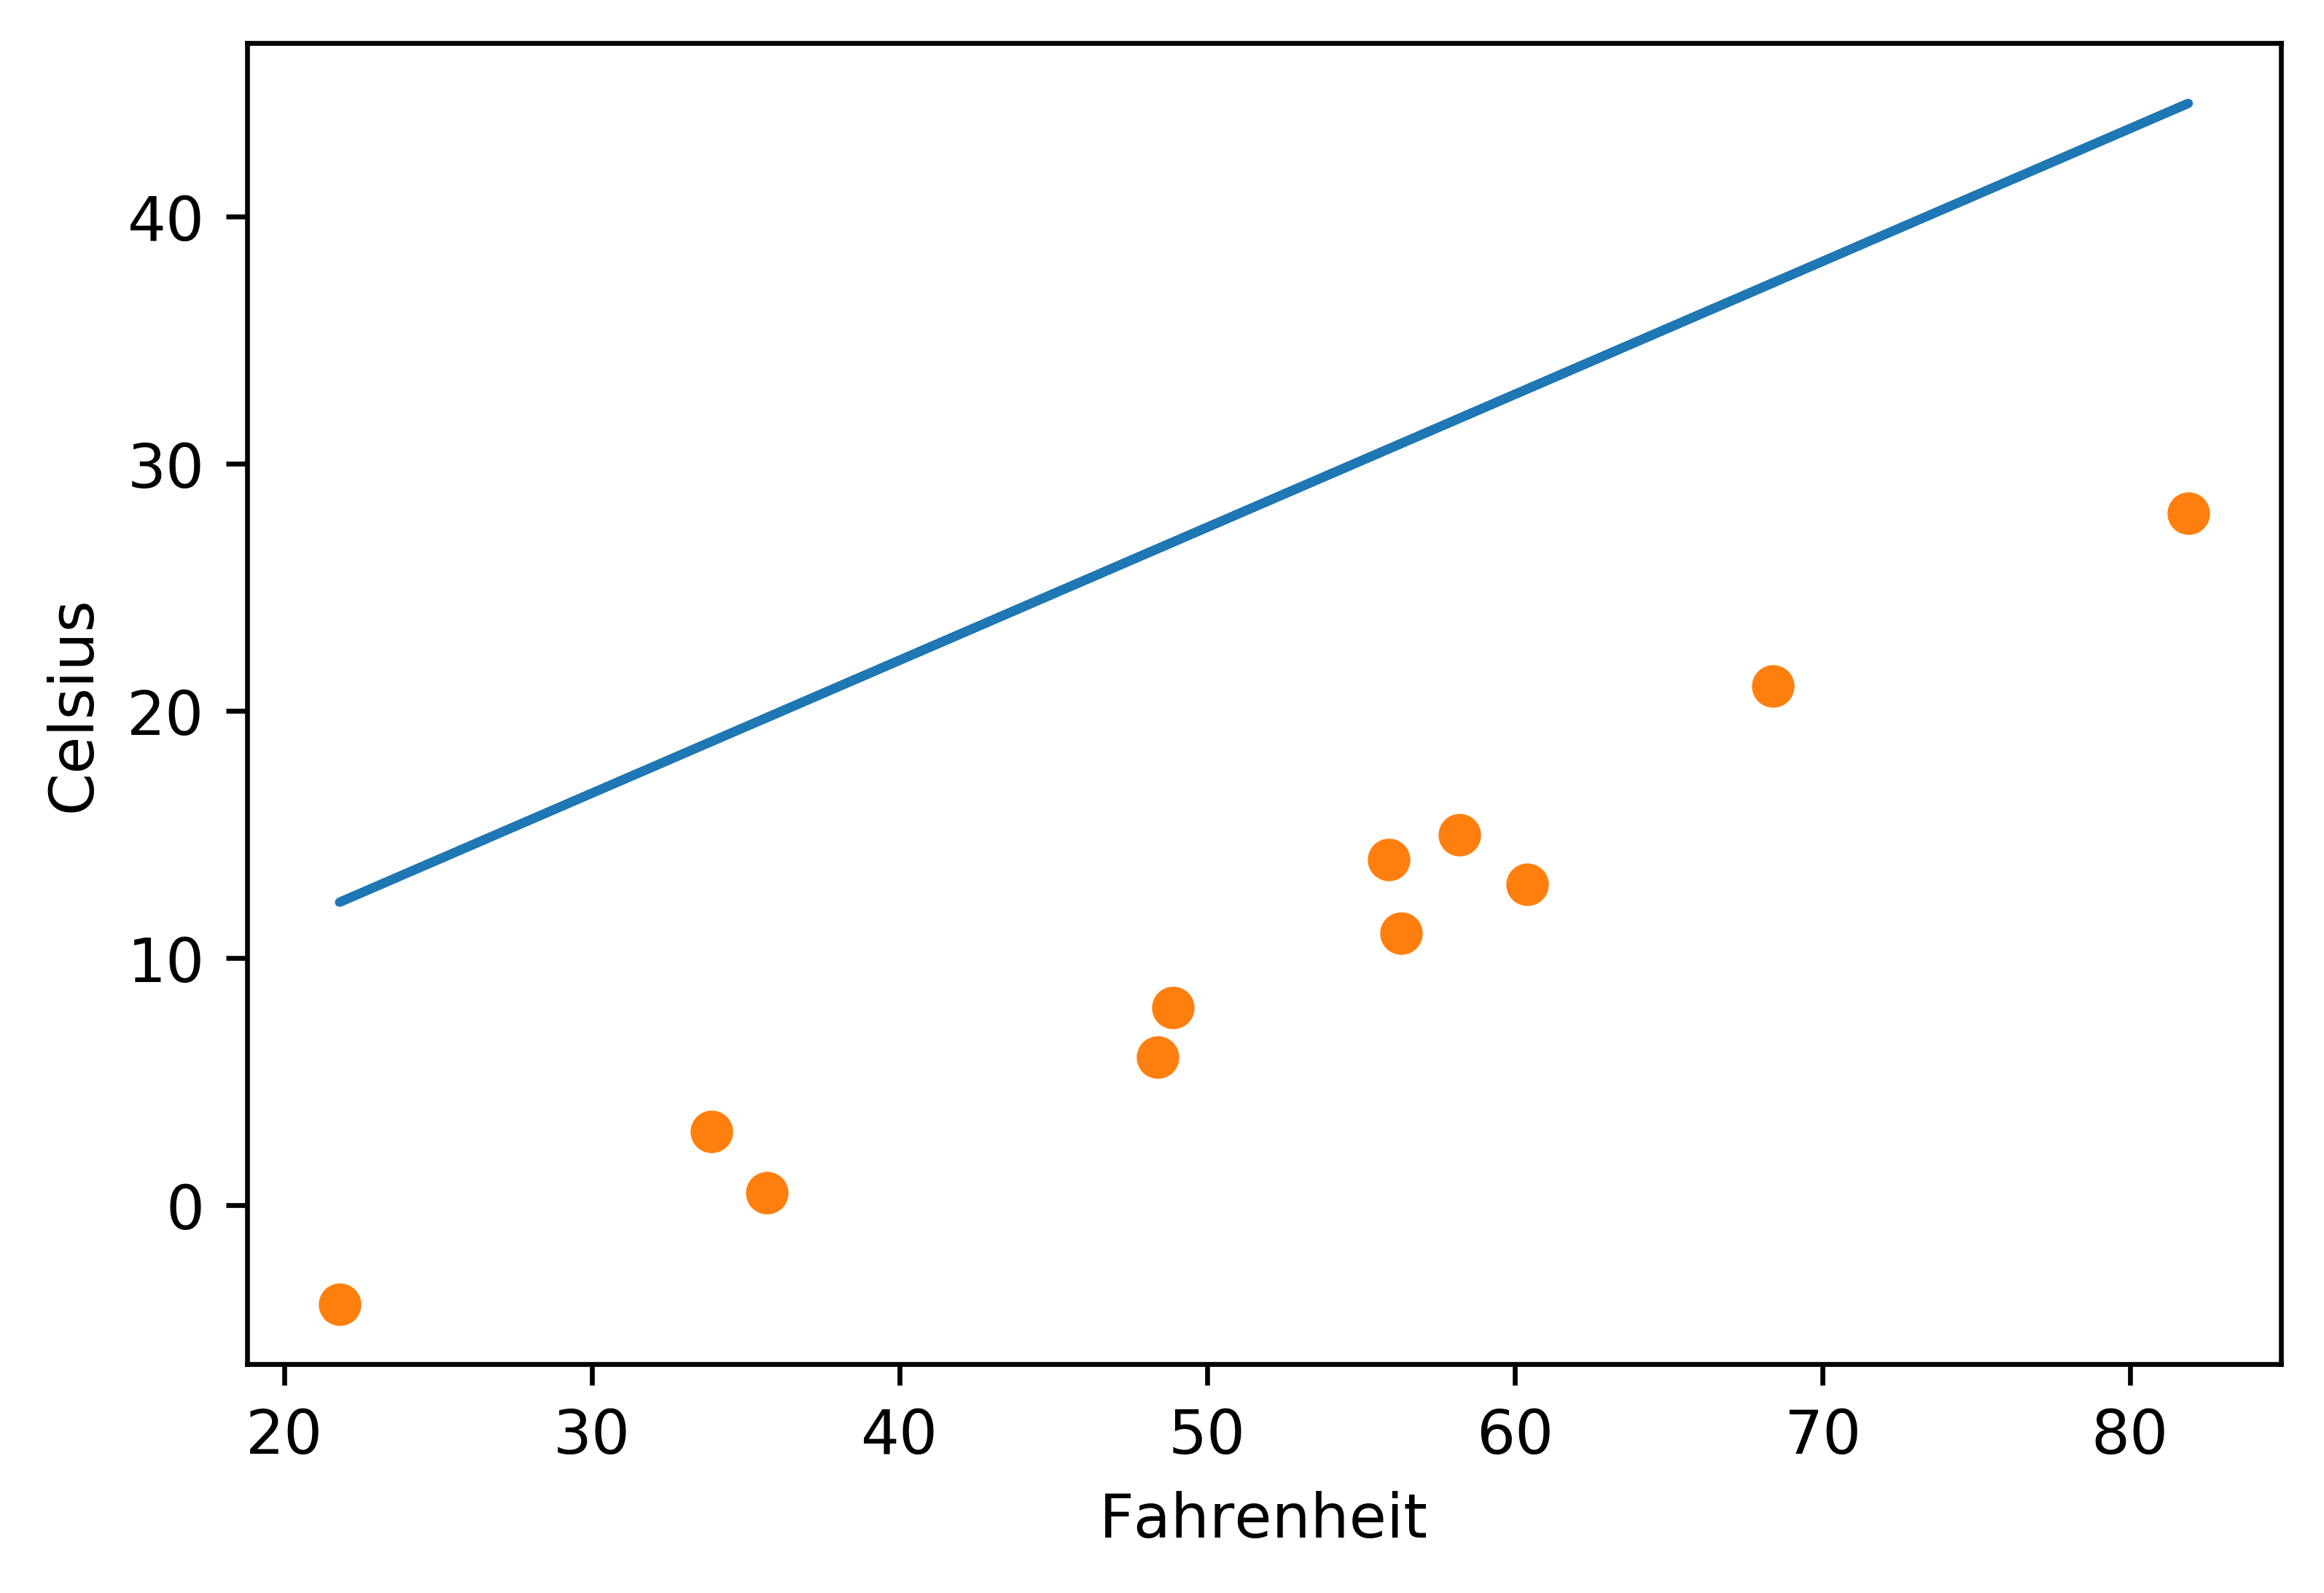

In [61]:
%matplotlib inline
from matplotlib import pyplot as plt

t_p = model(tun, *params)  # <1>

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(tu.numpy(), tp.detach().numpy()) # <2>
plt.plot(tu.numpy(), tc.numpy(), 'o')